<center>

<image src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo/LOGOTIPO%20color%20PNG.png" alt="UPM Logo" height=150>


<h1 style="text-align: center;">  </h1>

# Trabajo de Fin de Grado

## Carlota Medrano

### Supervised by Giannicola Scarpa

</center>


# 1. Index <a name="index"></a>

1. [Index](#index)
2. [Install packages](#install1)
3. [Install libraries](#install2)
4. [Main code](#main)
5. [Allais examples](#allais)
6. [Ellsberg examples](#ellsberg)

# 2. Install Packages <a name="install"></a>

In [21]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 30.6 MB/s eta 0:00:00a 0:00:01


# 3. Install Libraries <a name="install2"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 4. Main Code <a name="main"></a>

### 4.1. Initialize the random seed


In [207]:
np.random.seed(round(datetime.now().timestamp()))

### 4.2. Functions to generate the data

A) Allais data generation function

In [208]:
def allais_data(N):
    
    # Initialize the list to hold all lists
    data = []
    
    for _ in range(N):
        # Generate random values for valuea, valueb and valuec

        number = round(np.random.uniform(0, 0.99), 2)
        if number < 0.89:
            valuea = 1
        elif number == 0.89:
            valuea = 0
        else:
            valuea = 5

        if round(np.random.uniform(0, 0.99), 2) < 0.89:
            valueb = 0
        else:
            valueb = 1
            
        if round(np.random.uniform(0, 0.99), 2) < 0.90:
            valuec = 0
        else:
            valuec = 5
        
        # Create the 4 lists
        data.append([1, 0, 0, 0, 1])
        data.append([0, 1, 0, 0, valuea])
        data.append([0, 0, 1, 0, valueb])
        data.append([0, 0, 0, 1, valuec])
    
    # Convert the list of lists into a pandas DataFrame
    df = pd.DataFrame(data, columns=['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B', 'Winnings'])
    
    return df

B) Ellsberg data generation function

In [209]:
def ellsberg_data(N):
    
    # Initialize the list to hold all lists
    data = []
    
    # Proportion of red balls in the urn
    prop_red = 30
    
    for _ in range(N):
        
        # Generate random values for valuea, valueb, valuec and valued
        # The probabilities are ordered as red, black, yellow
        # Generate a random number between 0 and 89 inclusive
        if np.random.randint(0, 90) < prop_red:
            valuea = 100
        else:
            valuea = 0
        
        # Proportion of black balls in the urn
        prop_black = np.random.randint(0, 60)
        number = np.random.randint(0, 90)
        if  number >= prop_red and number < prop_red + prop_black:
            valueb = 100
        else:
            valueb = 0
        
        number = np.random.randint(0, 90)
        if number < prop_red or number >= prop_red + prop_black:
            valuec = 100
        else:
            valuec = 0
        
        if np.random.randint(0, 90) >= prop_red:
            valued = 100
        else:
            valued = 0
        
        # Create the 4 lists
        data.append([1, 0, 0, 0, valuea])
        data.append([0, 1, 0, 0, valueb])
        data.append([0, 0, 1, 0, valuec])
        data.append([0, 0, 0, 1, valued])
    
    # Convert the list of lists into a pandas DataFrame
    df = pd.DataFrame(data, columns=['Urn 1', 'Urn 2', 'Urn 3', 'Urn 4', 'Winnings'])
    
    return df

### 4.3. Function to fit the models

In [210]:
def nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN, EPOCHS=200, BATCH_SIZE=10):
    
    if MODEL_TYPE == 'allais':
        df = allais_data(N)
    elif MODEL_TYPE == 'ellsberg':
        df = ellsberg_data(N)
    else:
        print('Invalid model type')
        return

    # Shuffle the dataframe
    df = shuffle(df)

    # Split the data into training and testing sets
    X = df[TRAINING_COLUMNS].values
    y = df[TEST_COLUMN].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create the neural network
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation='relu'))  # First hidden layer with 10 neurons
    model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (regression)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    # Define early stopping callback
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0) #callbacks=[early_stopping])

    return model, history

### 4.4. Function to carry out the simulation and plot its results

In [211]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def result(NN_NUMBER, MSE_THRESHOLD, MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN, EPOCHS, BATCH_SIZE):
    
    mse = []
    df_results = pd.DataFrame(columns=['Experiment 1', 'Experiment 2'])
    
    # Train the model
    print('Training model...')
    for nn_number in range(NN_NUMBER):
        
        mse_threshold = np.inf  # Reset mse_threshold for each new model training
        
        if MSE_THRESHOLD == 'None':
            print('Neural network number:', nn_number + 1)
            
            # Train the model
            model, history = nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN, EPOCHS, BATCH_SIZE)
            
            # Condition to stop the training
            mse_threshold = history.history['val_mean_squared_error'][-1]
        else:
            # Print the number of the neural network
            print(f'Neural network number: {nn_number + 1}')
            training = 0
            
            while MSE_THRESHOLD < mse_threshold: 
                
                # Print the number of trainings
                print(f'Training: {training}')
                 
                # Train the model
                model, history = nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN, EPOCHS, BATCH_SIZE)
                
                # Condition to stop the training
                mse_threshold = history.history['val_mean_squared_error'][-1]
                
                # Increase the number of trainings
                training += 1
        
        # Append the MSE to the list
        mse.append(mse_threshold)
            
        # Evaluate the model on the x gambles
        valuea = model.predict(np.array([[1, 0, 0, 0]]))
        valueb = model.predict(np.array([[0, 1, 0, 0]]))
        valuec = model.predict(np.array([[0, 0, 1, 0]]))
        valued = model.predict(np.array([[0, 0, 0, 1]]))
        
        #print('Value A:', valuea, 'Value B:', valueb, 'Value C:', valuec, 'Value D:', valued)
        
        if MODEL_TYPE == 'allais':
            # Determine the gambles
            gamble1 = '1A' if valuea >= valueb else '1B'
            gamble2 = '2A' if valuec >= valued else '2B'
        
        else:
            # Determine the gambles
            gamble1 = 'Urn 1' if valuea >= valueb else 'Urn 2'
            gamble2 = 'Urn 3' if valuec >= valued else 'Urn 4'
        
        # Append results to df_results
        df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)
    
    # Calculate the number of risk aversion and inconsistency
    if MODEL_TYPE == 'allais':
        # Risk aversion refers to choosing 1A over 1B
        risk_aversion = len(df_results[(df_results['Experiment 1'] == '1A')]) 
        # Allais refers to the outcome of the experiments, i.e., 1A and 2B
        allais = len(df_results[(df_results['Experiment 1'] == '1A') & (df_results['Experiment 2'] == '2B')]) 
    else:
        # Risk taking refers to choosing Urn 2 and Urn 4
        risk_taking = len(df_results[(df_results['Experiment 1'] == 'Urn 2') & (df_results['Experiment 2'] == 'Urn 4')])
        # Ellsberg referes to the "sure" option in the urns, i.e., Urn 1 and Urn 3
        ellsberg = len(df_results[(df_results['Experiment 1'] == 'Urn 1') & (df_results['Experiment 2'] == 'Urn 3')])   
    
    if MODEL_TYPE == 'allais':
        # Calculate the percentages
        risk_aversion = risk_aversion / NN_NUMBER * 100
        allais = allais / NN_NUMBER * 100
    
        # Print the MSE
        mse_threshold = np.mean(mse)
        print(f'Average MSE of {NN_NUMBER} neural networks: {mse_threshold}')
        
        # Return the results
        print('Risk aversion:', risk_aversion, '%')
        print('Allais:', allais, '%')
        print('Results:', '\n', df_results.value_counts())
    
        return df_results, risk_aversion, allais
    
    else:
        # Calculate the percentages
        risk_taking = risk_taking / NN_NUMBER * 100
        ellsberg = ellsberg / NN_NUMBER * 100
    
        # Print the MSE
        mse_threshold = np.mean(mse)
        print(f'Average MSE of {NN_NUMBER} neural networks: {mse_threshold}')
        
        # Return the results
        print('Risk taking:', risk_taking, '%')
        print('Ellsberg:', ellsberg, '%')
        print('Results:', '\n', df_results.value_counts())
    
        return df_results, risk_taking, ellsberg


### 4.5. Functions to plot the results of the different models

In [212]:
def plot_inconsistencies(CSV_FILES_PATHS, OUTPUT_PATH, TYPE, MODEL_TYPE):

    # Define the type of plot
    if TYPE == 1:
        type = 'varying Dataset Size'
        output_ending = 'dataset_size'
    else:
        type = 'varying Model Complexity'
        output_ending = 'model_complexity'
        
    # Dictionary to store the percentage of inconsistencies for each dataset size
    inconsistencies = {}

    # Calculate inconsistencies
    for size, filepath in CSV_FILES_PATHS.items():
        df = pd.read_csv(filepath)
        total = len(df)
        if MODEL_TYPE == 'allais':
            inconsistency_count = (
                len(df[(df['Experiment 1'] == '1A') & (df['Experiment 2'] == '2B')])
            )
        else:
            inconsistency_count = (
                len(df[(df['Experiment 1'] == 'Urn 1') & (df['Experiment 2'] == 'Urn 3')]) 
            )
        inconsistencies[size] = (inconsistency_count / total) * 100

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(inconsistencies.keys(), inconsistencies.values(), marker='o', linestyle='-', color='b')
    plt.title(f'Percentage of Inconsistencies {type}')
    plt.xlabel('Dataset Size')
    if MODEL_TYPE == 'allais':
        plt.ylabel('Percentage of Allais')
    else:
        plt.ylabel('Percentage of Ellsberg')
    plt.grid(True)

    # Check if the output path exists, if not create it and save the plot
    output_path = f'{OUTPUT_PATH}'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(f'{OUTPUT_PATH}/inconsistencies_plot_{output_ending}_{MODEL_TYPE}.png')

    # Show plot
    plt.show()

In [213]:
def plot_risk(CSV_FILES_PATHS, OUTPUT_PATH, TYPE, MODEL_TYPE):
    
    # Define the type of plot
    if TYPE == 1:
        type = 'varying Dataset Size'
        output_ending = 'dataset_size'
    else:
        type = 'varying Model Complexity'
        output_ending = 'model_complexity'
        
    # Dictionary to store the percentage of inconsistencies for each dataset size
    risk_aversion = {}

    # Calculate inconsistencies
    for size, filepath in CSV_FILES_PATHS.items():
        df = pd.read_csv(filepath)
        total = len(df)
        if MODEL_TYPE == 'allais':
            risk_aversion_count = ( 
                len(df[(df['Experiment 1'] == '1A')]) 
            )
        else:
            risk_aversion_count = ( 
                len(df[(df['Experiment 1'] == 'Urn 2') & (df['Experiment 2'] == 'Urn 4')]) 
            )
        risk_aversion[size] = (risk_aversion_count / total) * 100

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(risk_aversion.keys(), risk_aversion.values(), marker='o', linestyle='-', color='b')
    plt.xlabel('Dataset Size')
    if MODEL_TYPE == 'allais':
        plt.title(f'Percentage of Risk Aversion {type}')
        plt.ylabel('Percentage of Risk Aversion')
    else:
        plt.title(f'Percentage of Risk Taking {type}')
        plt.ylabel('Percentage of Risk Taking')
    plt.grid(True)

    # Check if the output path exists, if not create it and save the plot
    output_path = f'{OUTPUT_PATH}'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(f'{OUTPUT_PATH}/risk_plot_{output_ending}_{MODEL_TYPE}.png')

    # Show plot
    plt.show()

In [214]:
def plot_selection(CSV_FILES_PATHS,OUTPUT_PATH, TYPE, MODEL_TYPE):
    
    # Define the type of plot
    if TYPE == 1:
        type = 'varying Dataset Size'
        output_ending = 'dataset_size'
    else:
        type = 'varying Model Complexity'
        output_ending = 'model_complexity'

    if MODEL_TYPE == 'allais':
        # Initialize counts for Experiment 1 and Experiment 2
        exp1_counts = pd.Series(0, index=['1A', '1B'])
        exp2_counts = pd.Series(0, index=['2A', '2B'])

    else:
        # Initialize counts for Experiment 1 and Experiment 2
        exp1_counts = pd.Series(0, index=['Urn 1', 'Urn 2'])
        exp2_counts = pd.Series(0, index=['Urn 3', 'Urn 4'])
        
    # Count the number of times each gamble was selected across all datasets
    for filepath in CSV_FILES_PATHS.values():
        df = pd.read_csv(filepath)
        exp1_counts += df['Experiment 1'].value_counts().reindex(exp1_counts.index, fill_value=0)
        exp2_counts += df['Experiment 2'].value_counts().reindex(exp2_counts.index, fill_value=0)

    # Total counts for percentages
    total_exp1 = exp1_counts.sum()
    total_exp2 = exp2_counts.sum()

    # Plot for Experiment 1
    plt.figure(figsize=(10, 6))
    ax1 = exp1_counts.plot(kind='bar', color='blue', alpha=0.7)
    plt.title(f'Experiment 1 selections {type}')
    if MODEL_TYPE == 'allais':
        plt.xlabel('Gamble')
    else:
        plt.xlabel('Urn')
    plt.ylabel('Count')

    # Adding percentage on top of bars for Experiment 1
    for i in ax1.containers:
        ax1.bar_label(i, labels=[f'{val/total_exp1:.2%}' for val in exp1_counts])

    # Save and show plot for Experiment 1
    # Check if the output path exists, if not create it and save the plot
    output_path = f'{OUTPUT_PATH}'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(f'{OUTPUT_PATH}experiment1_selections_{output_ending}_{MODEL_TYPE}.png')
    plt.show()

    # Plot for Experiment 2
    plt.figure(figsize=(10, 6))
    ax2 = exp2_counts.plot(kind='bar', color='red', alpha=0.7)
    plt.title(f'Experiment 2 selections {type}')
    if MODEL_TYPE == 'allais':
        plt.xlabel('Gamble')
    else:
        plt.xlabel('Urn')
    plt.ylabel('Count')

    # Adding percentage on top of bars for Experiment 2
    for i in ax2.containers:
        ax2.bar_label(i, labels=[f'{val/total_exp2:.2%}' for val in exp2_counts])

    # Save and show plot for Experiment 2
    # Check if the output path exists, if not create it and save the plot
    output_path = f'{OUTPUT_PATH}'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(f'{OUTPUT_PATH}experiment2_selections_{output_ending}_{MODEL_TYPE}.png')
    plt.show()

# 5. Allais examples<a name="allais"></a>

Create a folder to save the results of the Allais examples

In [215]:
output_path = '/Users/carlota/Desktop/results/allais/'

if not os.path.exists(output_path):
    os.makedirs(output_path)

## 5.1 Allais example varying the dataset size

### A) Training the neural networks

* Tiny dataset

In [216]:
# Train the model
df_results_n_1_nn_100_epochs_100_batchsize_4, risk_aversion_n_1_nn_100_epochs_100_batchsize_4, allais_n_1_nn_100_epochs_100_batchsize_4  = result(MSE_THRESHOLD='None', MODEL_TYPE='allais', N=1, NN_NUMBER=100, TRAINING_COLUMNS=['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=4)
df_results_n_1_nn_100_epochs_100_batchsize_4.to_csv(f'{output_path}results_n_1_nn_100_epochs_100_batchsize_4.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 9ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Average MSE of 100 neural networks: 1.9279081411597494
Risk aversion: 53.0 %
Allais: 21.0 %
Results: 
 Experiment 1  Experiment 2
1A            2A              32
1B            2B              27
1A            2B              21
1B            2A              20
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Small dataset

In [217]:
# Train the model
df_results_n_10_nn_100_epochs_100_batchsize_40, risk_aversion_n_10_nn_100_epochs_100_batchsize_40, allais_n_1_nn_100_epochs_100_batchsize_40  = result(MSE_THRESHOLD='None', MODEL_TYPE='allais', N=10, NN_NUMBER=100, TRAINING_COLUMNS=['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=40)
df_results_n_10_nn_100_epochs_100_batchsize_40.to_csv(f'{output_path}results_n_10_nn_100_epochs_100_batchsize_40.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 11ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Average MSE of 100 neural networks: 1.3266544589353726
Risk aversion: 45.0 %
Allais: 17.0 %
Results: 
 Experiment 1  Experiment 2
1B            2B              31
1A            2A              28
1B            2A              24
1A            2B              17
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Medium dataset

In [218]:
# Train the model
df_results_n_100_nn_100_epochs_100_batchsize_400, risk_aversion_n_100_nn_100_epochs_100_batchsize_400, allais_n_100_nn_100_epochs_100_batchsize_400  = result(MSE_THRESHOLD='None', MODEL_TYPE='allais', N=100, NN_NUMBER=100, TRAINING_COLUMNS=['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=400)
df_results_n_100_nn_100_epochs_100_batchsize_400.to_csv(f'{output_path}results_n_100_nn_100_epochs_100_batchsize_400.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 13ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 76ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Average MSE of 100 neural networks: 1.3108901838213205
Risk aversion: 42.0 %
Allais: 27.0 %
Results: 
 Experiment 1  Experiment 2
1B            2B              35
1A            2B              27
1B            2A              23
1A            2A              15
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Large dataset


In [219]:
# Train the model
df_results_n_1000_nn_100_epochs_100_batchsize_4000, risk_aversion_n_1000_nn_100_epochs_100_batchsize_4000, allais_n_1000_nn_100_epochs_100_batchsize_4000  = result(MSE_THRESHOLD='None', MODEL_TYPE='allais', N=1000, NN_NUMBER=100, TRAINING_COLUMNS=['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=4000)
df_results_n_1000_nn_100_epochs_100_batchsize_4000.to_csv(f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 10ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 13ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 61ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Average MSE of 100 neural networks: 1.4095900785923003
Risk aversion: 42.0 %
Allais: 27.0 %
Results: 
 Experiment 1  Experiment 2
1B            2B              34
1A            2B              27
1B            2A              24
1A            2A              15
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


### B) Plotting the results

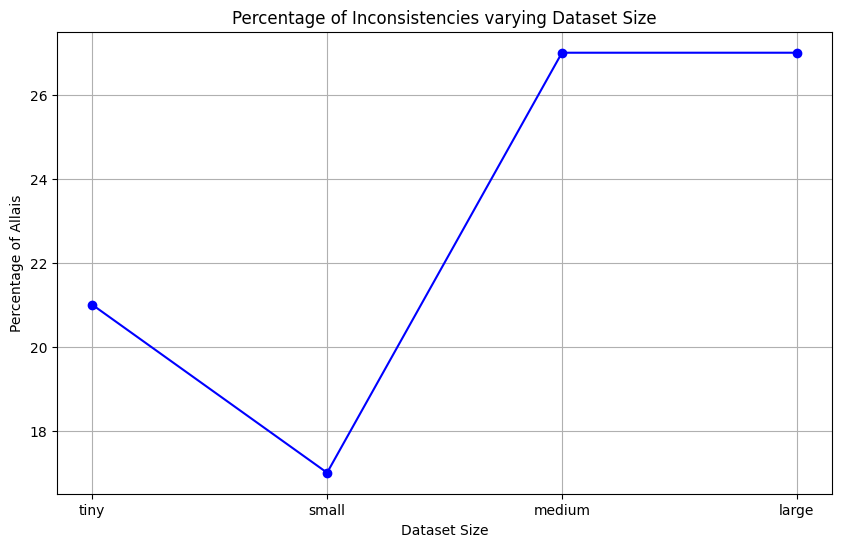

In [220]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1_nn_100_epochs_100_batchsize_4.csv',
    'small': f'{output_path}results_n_10_nn_100_epochs_100_batchsize_40.csv',
    'medium': f'{output_path}results_n_100_nn_100_epochs_100_batchsize_400.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv'
}

plot_inconsistencies(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/allais/', TYPE=1, MODEL_TYPE='allais')

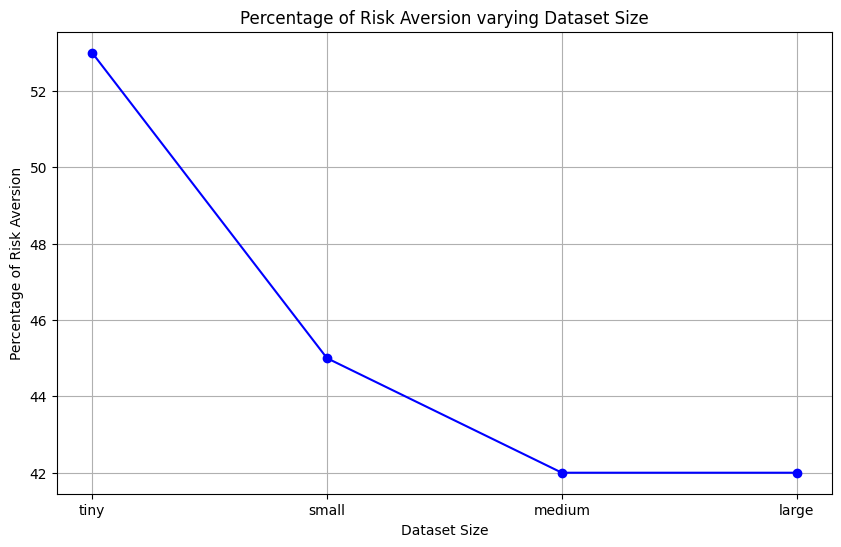

In [221]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1_nn_100_epochs_100_batchsize_4.csv',
    'small': f'{output_path}results_n_10_nn_100_epochs_100_batchsize_40.csv',
    'medium': f'{output_path}results_n_100_nn_100_epochs_100_batchsize_400.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv'
}

plot_risk(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/allais/', TYPE=1, MODEL_TYPE='allais')

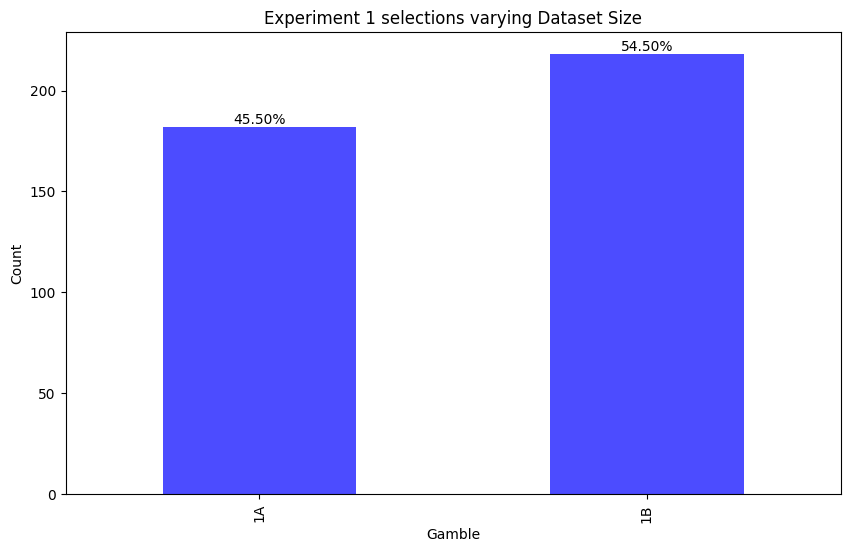

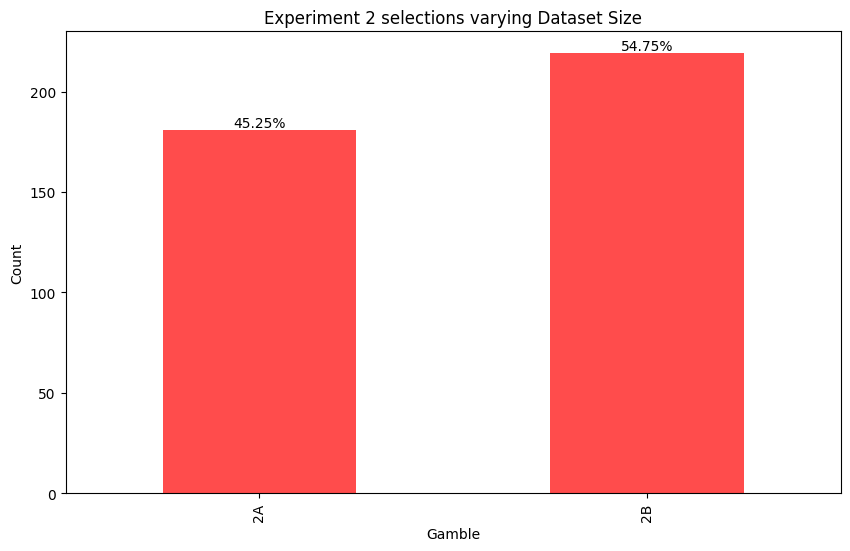

In [222]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1_nn_100_epochs_100_batchsize_4.csv',
    'small': f'{output_path}results_n_10_nn_100_epochs_100_batchsize_40.csv',
    'medium': f'{output_path}results_n_100_nn_100_epochs_100_batchsize_400.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv'
}

plot_selection(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/allais/', TYPE=1, MODEL_TYPE='allais')

## 5.2 Allais example varying the model complexity

### A) Training the neural networks

* Tiny model

In [223]:
def nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN, EPOCHS=200, BATCH_SIZE=10):
    
    if MODEL_TYPE == 'allais':
        df = allais_data(N)
    else:
        print('Invalid model type')
        return

    # Shuffle the dataframe
    df = shuffle(df)

    # Split the data into training and testing sets
    X = df[TRAINING_COLUMNS].values
    y = df[TEST_COLUMN].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create the neural network
    model = Sequential()
    model.add(Dense(1, input_dim=4, activation='relu'))  # First hidden layer with 10 neurons
    model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (regression)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    # Define early stopping callback
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0) # callbacks=[early_stopping]

    return model, history

In [224]:
# Train the model
df_results_n_1000_nn_100_epochs_100_batchsize_4000_tiny, risk_aversion_n_1000_nn_100_epochs_100_batchsize_4000_tiny, allais_n_1000_nn_100_epochs_100_batchsize_4000_tiny  = result(MSE_THRESHOLD='None', MODEL_TYPE='allais', N=1000, NN_NUMBER=100, TRAINING_COLUMNS=['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B'], TEST_COLUMN ='Winnings', EPOCHS=100, BATCH_SIZE=4000)
df_results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.to_csv(f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 10ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Average MSE of 100 neural networks: 1.6009159171581269
Risk aversion: 72.0 %
Allais: 26.0 %
Results: 
 Experiment 1  Experiment 2
1A            2A              46
              2B              26
1B            2A              18
              2B              10
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Small model

In [225]:
def nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN, EPOCHS=200, BATCH_SIZE=10):
    
    if MODEL_TYPE == 'allais':
        df = allais_data(N)
    else:
        print('Invalid model type')
        return

    # Shuffle the dataframe
    df = shuffle(df)

    # Split the data into training and testing sets
    X = df[TRAINING_COLUMNS].values
    y = df[TEST_COLUMN].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create the neural network
    model = Sequential()
    model.add(Dense(5, input_dim=4, activation='relu'))  # First hidden layer with 10 neurons
    model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (regression)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    # Define early stopping callback
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0) # callbacks=[early_stopping]

    return model, history

In [226]:
# Train the model
df_results_n_1000_nn_100_epochs_100_batchsize_4000_small, risk_aversion_n_1000_nn_100_epochs_100_batchsize_4000_small, allais_n_1000_nn_100_epochs_100_batchsize_4000_small  = result(MSE_THRESHOLD='None', MODEL_TYPE='allais', N=1000, NN_NUMBER=100, TRAINING_COLUMNS=['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=4000)
df_results_n_1000_nn_100_epochs_100_batchsize_4000_small.to_csv(f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_small.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 10ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 19ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 64ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 13ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 56ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Average MSE of 100 neural networks: 1.552139196395874
Risk aversion: 54.0 %
Allais: 31.0 %
Results: 
 Experiment 1  Experiment 2
1A            2B              31
1B            2B              26
1A            2A              23
1B            2A              20
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Large model

In [227]:
def nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN, EPOCHS=200, BATCH_SIZE=10):
    
    if MODEL_TYPE == 'allais':
        df = allais_data(N)
    else:
        print('Invalid model type')
        return

    # Shuffle the dataframe
    df = shuffle(df)

    # Split the data into training and testing sets
    X = df[TRAINING_COLUMNS].values
    y = df[TEST_COLUMN].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create the neural network
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation='relu'))  # First hidden layer with 10 neurons
    model.add(Dense(5, activation='relu'))  # Second hidden layer with 5 neurons
    model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (regression)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    # Define early stopping callback
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0) #callbacks=[early_stopping]

    return model, history

In [228]:
# Train the model
df_results_n_1000_nn_100_epochs_100_batchsize_4000_large, risk_aversion_n_1000_nn_100_epochs_100_batchsize_4000_large, allais_n_1000_nn_100_epochs_100_batchsize_4000_large  = result(MSE_THRESHOLD='None', MODEL_TYPE='allais', N=1000, NN_NUMBER=100, TRAINING_COLUMNS=['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=4000)
df_results_n_1000_nn_100_epochs_100_batchsize_4000_large.to_csv(f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_large.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 10ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 15ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 84ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 16ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 58ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 13ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 13ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 105ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 64ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Average MSE of 100 neural networks: 1.4078717017173767
Risk aversion: 55.00000000000001 %
Allais: 38.0 %
Results: 
 Experiment 1  Experiment 2
1A            2B              38
1B            2B              29
1A            2A              17
1B            2A              16
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


### B) Plotting the results

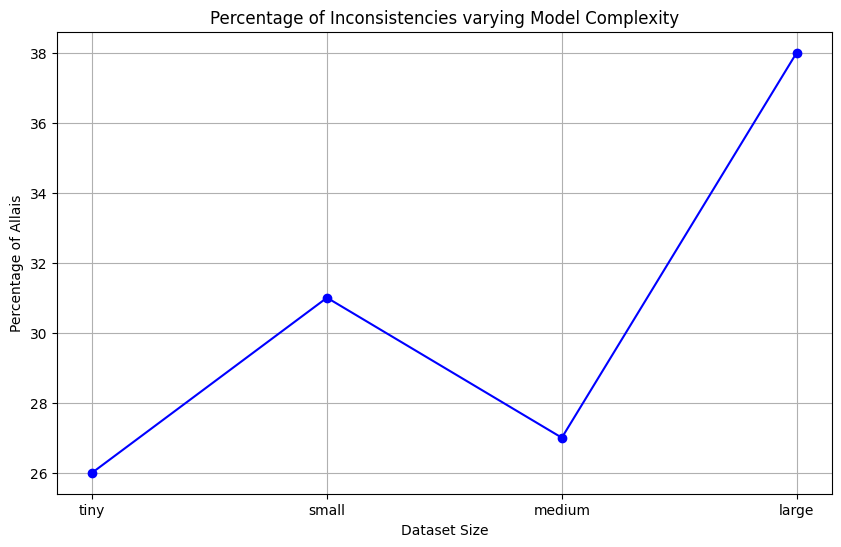

In [229]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.csv',
    'small': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_small.csv',
    'medium': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_large.csv',
}

plot_inconsistencies(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/allais/', TYPE=2, MODEL_TYPE='allais')

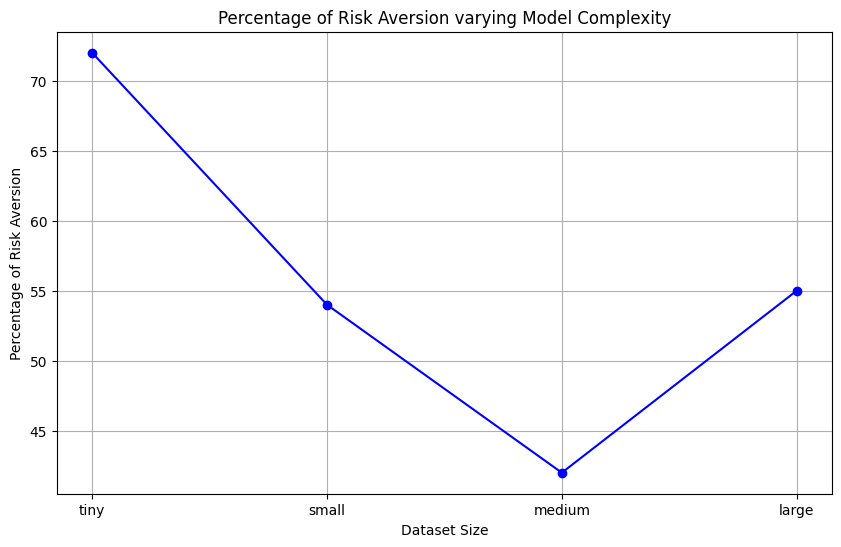

In [230]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.csv',
    'small': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_small.csv',
    'medium': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_large.csv',
}

plot_risk(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/allais/', TYPE=2, MODEL_TYPE='allais')

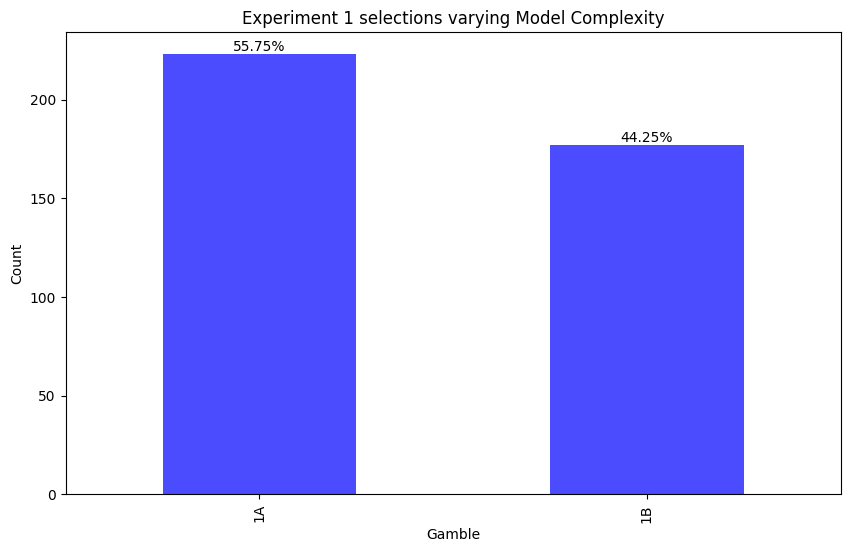

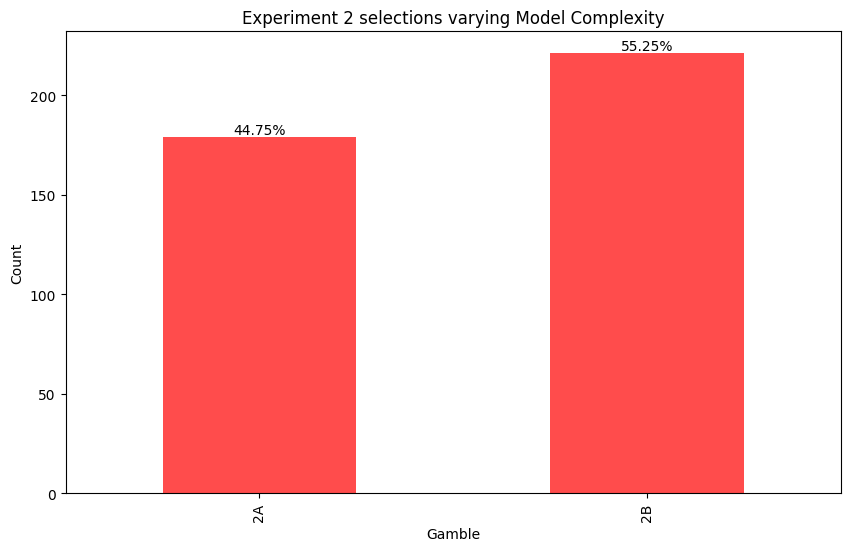

In [231]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.csv',
    'small': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_small.csv',
    'medium': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_large.csv',
}

plot_selection(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/allais/', TYPE=2, MODEL_TYPE='allais')

# 6. Ellsberg examples<a name="ellsberg"></a>

Create a folder to save the results of the Ellsberg examples

In [232]:
output_path = '/Users/carlota/Desktop/results/ellsberg/'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [233]:
def nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN, EPOCHS=200, BATCH_SIZE=10):
    
    if MODEL_TYPE == 'allais':
        df = allais_data(N)
    elif MODEL_TYPE == 'ellsberg':
        df = ellsberg_data(N)
    else:
        print('Invalid model type')
        return

    # Shuffle the dataframe
    df = shuffle(df)

    # Split the data into training and testing sets
    X = df[TRAINING_COLUMNS].values
    y = df[TEST_COLUMN].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create the neural network
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation='relu'))  # First hidden layer with 10 neurons
    model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (regression)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    # Define early stopping callback
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0) #callbacks=[early_stopping])

    return model, history

## 6.1 Ellsberg example varying the dataset size

### A) Training the neural networks

* Tiny dataset

In [234]:
# Train the model
df_results_n_1_nn_100_epochs_100_batchsize_4, risk_taking_n_1_nn_100_epochs_100_batchsize_4, ellsberg_n_1_nn_100_epochs_100_batchsize_4  = result(MSE_THRESHOLD='None', MODEL_TYPE='ellsberg', N=1, NN_NUMBER=100, TRAINING_COLUMNS=['Urn 1', 'Urn 2', 'Urn 3', 'Urn 4'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=4)
df_results_n_1_nn_100_epochs_100_batchsize_4.to_csv(f'{output_path}results_n_1_nn_100_epochs_100_batchsize_4.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 11ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 14ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 14ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 106ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Average MSE of 100 neural networks: 5592.785741328801
Risk taking: 18.0 %
Ellsberg: 28.999999999999996 %
Results: 
 Experiment 1  Experiment 2
Urn 1         Urn 3           29
              Urn 4           29
Urn 2         Urn 3           24
              Urn 4           18
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Small dataset

In [235]:
# Train the model
df_results_n_10_nn_100_epochs_100_batchsize_40, risk_taking_n_10_nn_100_epochs_100_batchsize_40, ellsberg_n_10_nn_100_epochs_100_batchsize_40  = result(MSE_THRESHOLD='None', MODEL_TYPE='ellsberg', N=10, NN_NUMBER=100, TRAINING_COLUMNS=['Urn 1', 'Urn 2', 'Urn 3', 'Urn 4'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=40)
df_results_n_10_nn_100_epochs_100_batchsize_40.to_csv(f'{output_path}results_n_10_nn_100_epochs_100_batchsize_40.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 11ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 91ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 59ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 51ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 16ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Average MSE of 100 neural networks: 4702.024894394279
Risk taking: 25.0 %
Ellsberg: 26.0 %
Results: 
 Experiment 1  Experiment 2
Urn 1         Urn 3           26
              Urn 4           25
Urn 2         Urn 4           25
              Urn 3           24
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Medium dataset

In [236]:
# Train the model
df_results_n_100_nn_100_epochs_100_batchsize_400, risk_taking_n_100_nn_100_epochs_100_batchsize_400, ellsberg_n_100_nn_100_epochs_100_batchsize_400  = result(MSE_THRESHOLD='None', MODEL_TYPE='ellsberg', N=100, NN_NUMBER=100, TRAINING_COLUMNS=['Urn 1', 'Urn 2', 'Urn 3', 'Urn 4'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=400)
df_results_n_100_nn_100_epochs_100_batchsize_400.to_csv(f'{output_path}results_n_100_nn_100_epochs_100_batchsize_400.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 11ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 51ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 16ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 60ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 68ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Average MSE of 100 neural networks: 4961.830419921875
Risk taking: 26.0 %
Ellsberg: 28.999999999999996 %
Results: 
 Experiment 1  Experiment 2
Urn 1         Urn 3           29
Urn 2         Urn 4           26
Urn 1         Urn 4           25
Urn 2         Urn 3           20
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Large dataset

In [237]:
# Train the model
df_results_n_1000_nn_100_epochs_100_batchsize_4000, risk_taking_n_1000_nn_100_epochs_100_batchsize_4000, ellsberg_n_1000_nn_100_epochs_100_batchsize_4000  = result(MSE_THRESHOLD='None', MODEL_TYPE='ellsberg', N=1000, NN_NUMBER=100, TRAINING_COLUMNS=['Urn 1', 'Urn 2', 'Urn 3', 'Urn 4'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=4000)
df_results_n_1000_nn_100_epochs_100_batchsize_4000.to_csv(f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 11ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 17ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 64ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Average MSE of 100 neural networks: 4963.23078125
Risk taking: 22.0 %
Ellsberg: 21.0 %
Results: 
 Experiment 1  Experiment 2
Urn 1         Urn 4           29
Urn 2         Urn 3           28
              Urn 4           22
Urn 1         Urn 3           21
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


### B) Plotting the results

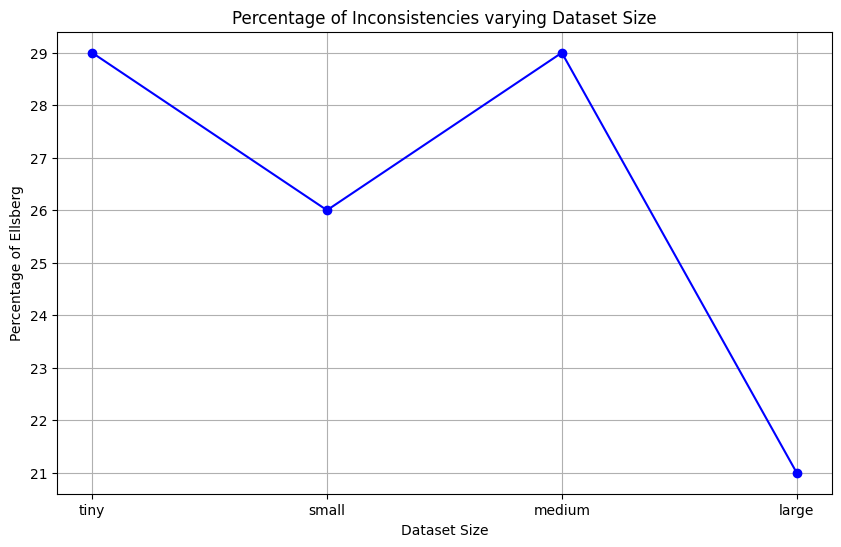

In [238]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1_nn_100_epochs_100_batchsize_4.csv',
    'small': f'{output_path}results_n_10_nn_100_epochs_100_batchsize_40.csv',
    'medium': f'{output_path}results_n_100_nn_100_epochs_100_batchsize_400.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv'
}

plot_inconsistencies(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/ellsberg/', TYPE=1, MODEL_TYPE='ellsberg')

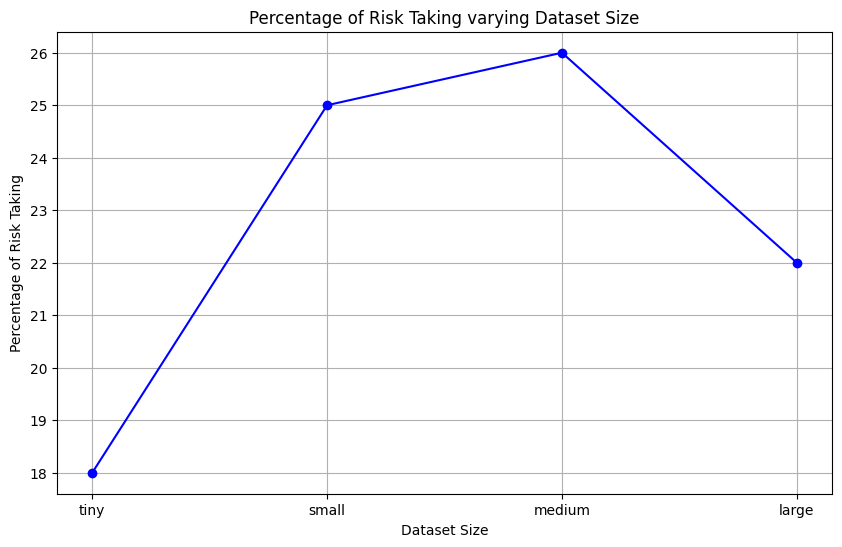

In [239]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1_nn_100_epochs_100_batchsize_4.csv',
    'small': f'{output_path}results_n_10_nn_100_epochs_100_batchsize_40.csv',
    'medium': f'{output_path}results_n_100_nn_100_epochs_100_batchsize_400.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv'
}

plot_risk(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/ellsberg/', TYPE=1, MODEL_TYPE='ellsberg')

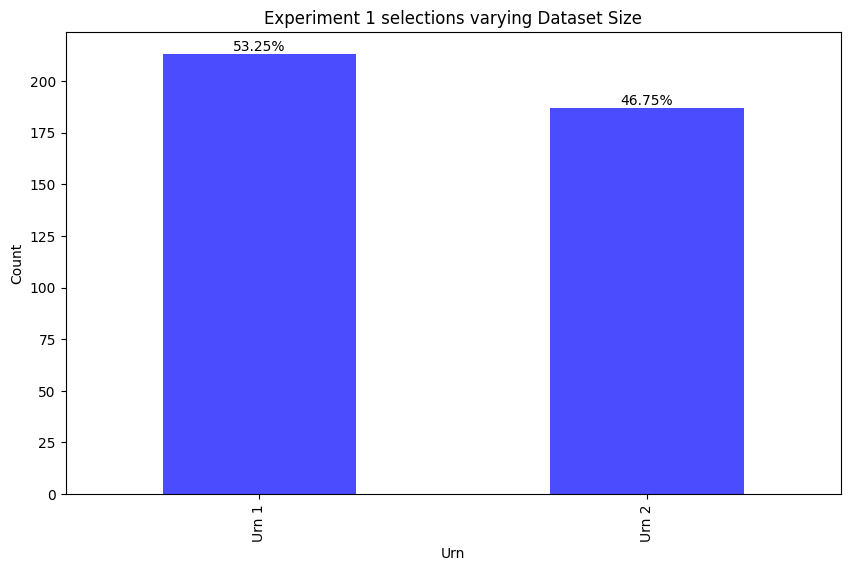

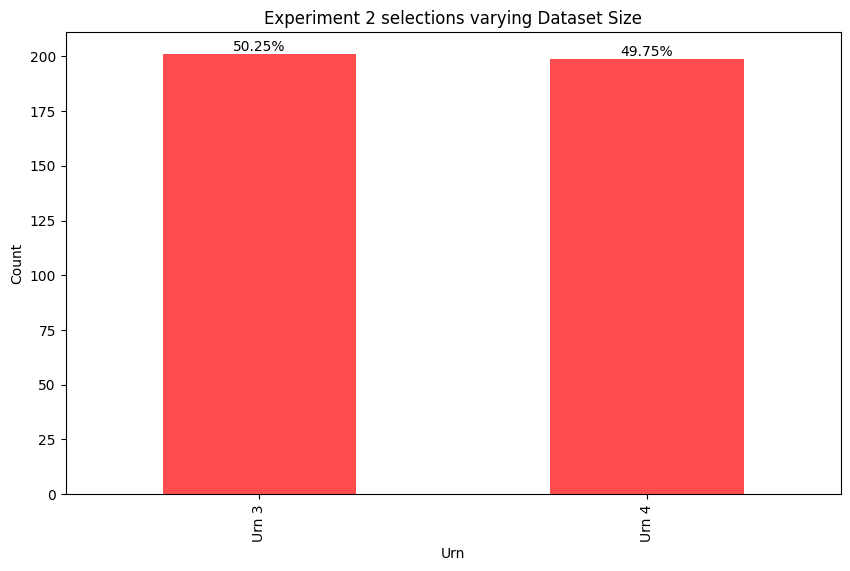

In [240]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1_nn_100_epochs_100_batchsize_4.csv',
    'small': f'{output_path}results_n_10_nn_100_epochs_100_batchsize_40.csv',
    'medium': f'{output_path}results_n_100_nn_100_epochs_100_batchsize_400.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv'
}

plot_selection(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/ellsberg/', TYPE=1, MODEL_TYPE='ellsberg')

## 6.2 Ellsberg example varying the model complexity

### A) Training the neural networks

* Tiny model

In [241]:
def nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN,EPOCHS =200, BATCH_SIZE=10):
    
    if MODEL_TYPE == 'allais':
        df = allais_data(N)
    elif MODEL_TYPE == 'ellsberg':
        df = ellsberg_data(N)
    else:
        print('Invalid model type')
        return

    # Shuffle the dataframe
    df = shuffle(df)

    # Split the data into training and testing sets
    X = df[TRAINING_COLUMNS].values
    y = df[TEST_COLUMN].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create the neural network
    model = Sequential()
    model.add(Dense(1, input_dim=4, activation='relu'))  # First hidden layer with 10 neurons
    model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (regression)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    return model, history

In [242]:
# Train the model
df_results_n_1000_nn_100_epochs_100_batchsize_4000_tiny, risk_taking_n_1000_nn_100_epochs_100_batchsize_4000_tiny, ellsberg_n_1000_nn_100_epochs_100_batchsize_4000_tiny  = result(MSE_THRESHOLD='None', MODEL_TYPE='ellsberg', N=1000, NN_NUMBER=100, TRAINING_COLUMNS=['Urn 1', 'Urn 2', 'Urn 3', 'Urn 4'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=4000)
df_results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.to_csv(f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 10ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 63ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 63ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Average MSE of 100 neural networks: 4935.160209960937
Risk taking: 12.0 %
Ellsberg: 38.0 %
Results: 
 Experiment 1  Experiment 2
Urn 1         Urn 3           38
              Urn 4           25
Urn 2         Urn 3           25
              Urn 4           12
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Small model

In [243]:
def nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN,EPOCHS =200, BATCH_SIZE=10):
    
    if MODEL_TYPE == 'allais':
        df = allais_data(N)
    elif MODEL_TYPE == 'ellsberg':
        df = ellsberg_data(N)
    else:
        print('Invalid model type')
        return

    # Shuffle the dataframe
    df = shuffle(df)

    # Split the data into training and testing sets
    X = df[TRAINING_COLUMNS].values
    y = df[TEST_COLUMN].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create the neural network
    model = Sequential()
    model.add(Dense(5, input_dim=4, activation='relu'))  # First hidden layer with 10 neurons
    model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (regression)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    return model, history

In [244]:
# Train the model
df_results_n_1000_nn_100_epochs_100_batchsize_4000_small, risk_taking_n_1000_nn_100_epochs_100_batchsize_4000_small, ellsberg_n_1000_nn_100_epochs_100_batchsize_4000_small  = result(MSE_THRESHOLD='None', MODEL_TYPE='ellsberg', N=1000, NN_NUMBER=100, TRAINING_COLUMNS=['Urn 1', 'Urn 2', 'Urn 3', 'Urn 4'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=4000)
df_results_n_1000_nn_100_epochs_100_batchsize_4000_small.to_csv(f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_small.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 11ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 54ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 13ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 14ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 13ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 54ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 64ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 15ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 13ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 15ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Average MSE of 100 neural networks: 4987.105185546875
Risk taking: 27.0 %
Ellsberg: 28.999999999999996 %
Results: 
 Experiment 1  Experiment 2
Urn 1         Urn 3           29
Urn 2         Urn 4           27
Urn 1         Urn 4           22
Urn 2         Urn 3           22
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


* Large model

In [245]:
def nn_model(MODEL_TYPE, N, TRAINING_COLUMNS, TEST_COLUMN, EPOCHS=200, BATCH_SIZE=10):
    
    if MODEL_TYPE == 'allais':
        df = allais_data(N)
    elif MODEL_TYPE == 'ellsberg':
        df = ellsberg_data(N)
    else:
        print('Invalid model type')
        return

    # Shuffle the dataframe
    df = shuffle(df)

    # Split the data into training and testing sets
    X = df[TRAINING_COLUMNS].values
    y = df[TEST_COLUMN].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create the neural network
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation='relu'))  # First hidden layer with 10 neurons
    model.add(Dense(5, activation='relu'))  # Second hidden layer with 5 neurons
    model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (regression)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    # Define early stopping callback
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    history = model.fit(X_train, y_train, epochs=1, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0) #callbacks=[early_stopping]

    return model, history

In [246]:
# Train the model
df_results_n_1000_nn_100_epochs_100_batchsize_4000_large, risk_taking_n_1000_nn_100_epochs_100_batchsize_4000_large, ellsberg_n_1000_nn_100_epochs_100_batchsize_4000_large  = result(MSE_THRESHOLD='None', MODEL_TYPE='ellsberg', N=1000, NN_NUMBER=100, TRAINING_COLUMNS=['Urn 1', 'Urn 2', 'Urn 3', 'Urn 4'], TEST_COLUMN ='Winnings', EPOCHS=50, BATCH_SIZE=4000)
df_results_n_1000_nn_100_epochs_100_batchsize_4000_large.to_csv(f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_large.csv', index=False)

Training model...
Neural network number: 1
1/1 [==============================] - 0s 11ms/step
Neural network number: 2


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 3


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 4


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 13ms/step
Neural network number: 5


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 6


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 7


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 8


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 9


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 10


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 11


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 12


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 13


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 14


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 15


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 16


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 14ms/step
Neural network number: 17


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 18


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 19


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 20


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 21


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 22


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 23


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 24


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 25


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 26


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 27


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 28


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 29


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 30


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 31


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 32


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 33


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 34


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 35


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 36


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 37


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 38


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 12ms/step
Neural network number: 39


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 40


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 41


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 42


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 43


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 44


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 45


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 46


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 47


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 48


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 49


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 50


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 51


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 52


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 53


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 54


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 55


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 56


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 57


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 58


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 59


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 60


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 61


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 62


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 63


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 14ms/step
Neural network number: 64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 65


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 66


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 67


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 68


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 69


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 70


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 71


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 72


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 73


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 14ms/step
Neural network number: 74


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 75


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 76


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 77


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 78


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 79


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 80


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 81


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 82


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 83


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 84


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 85


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 86


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 87


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 88


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 89


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 90


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 91


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 92


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 93


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step
Neural network number: 94


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 95


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 96


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 11ms/step
Neural network number: 97


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 98


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 9ms/step
Neural network number: 99


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Neural network number: 100


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


1/1 [==============================] - 0s 10ms/step
Average MSE of 100 neural networks: 5000.469931640625
Risk taking: 25.0 %
Ellsberg: 23.0 %
Results: 
 Experiment 1  Experiment 2
Urn 2         Urn 3           30
              Urn 4           25
Urn 1         Urn 3           23
              Urn 4           22
dtype: int64


/var/folders/nd/mfwt7yf50wdb5y15q3f9mzb80000gn/T/ipykernel_41558/1425116014.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Experiment 1': gamble1, 'Experiment 2': gamble2}, ignore_index=True)


### B) Plotting the results

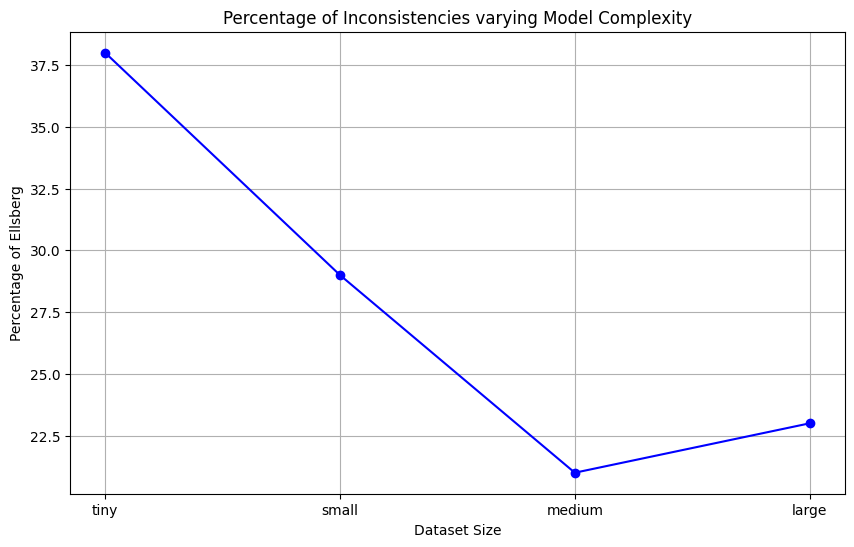

In [247]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.csv',
    'small':f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_small.csv',
    'medium': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_large.csv',
}

plot_inconsistencies(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/ellsberg/', TYPE=2, MODEL_TYPE='ellsberg')

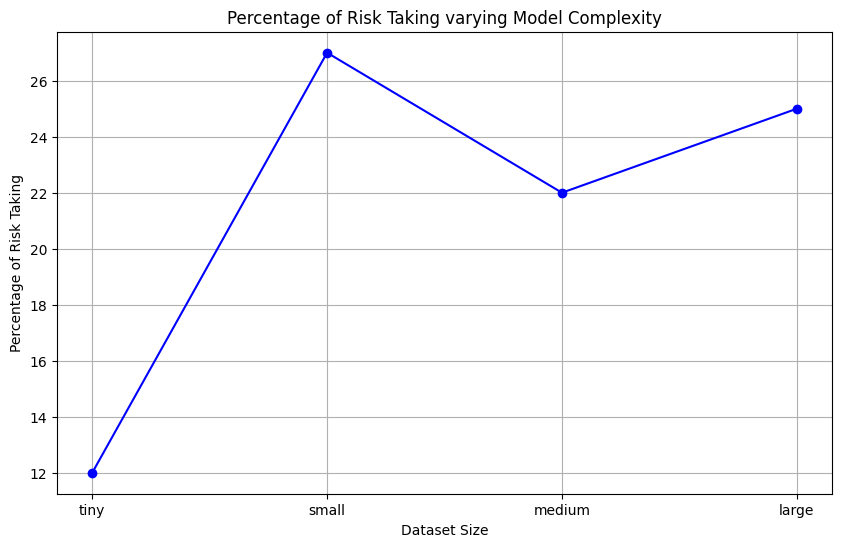

In [248]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.csv',
    'small':f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_small.csv',
    'medium': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_large.csv',
}

plot_risk(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/ellsberg/', TYPE=2, MODEL_TYPE='ellsberg')

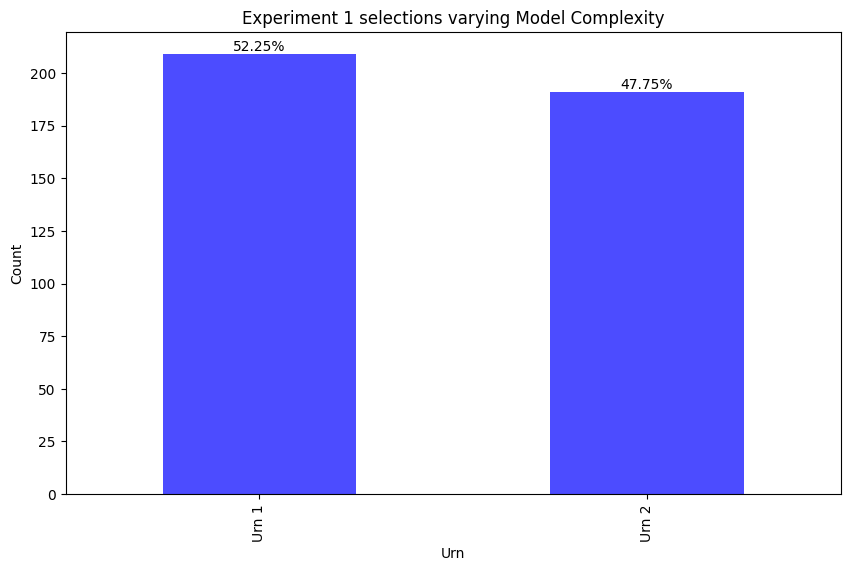

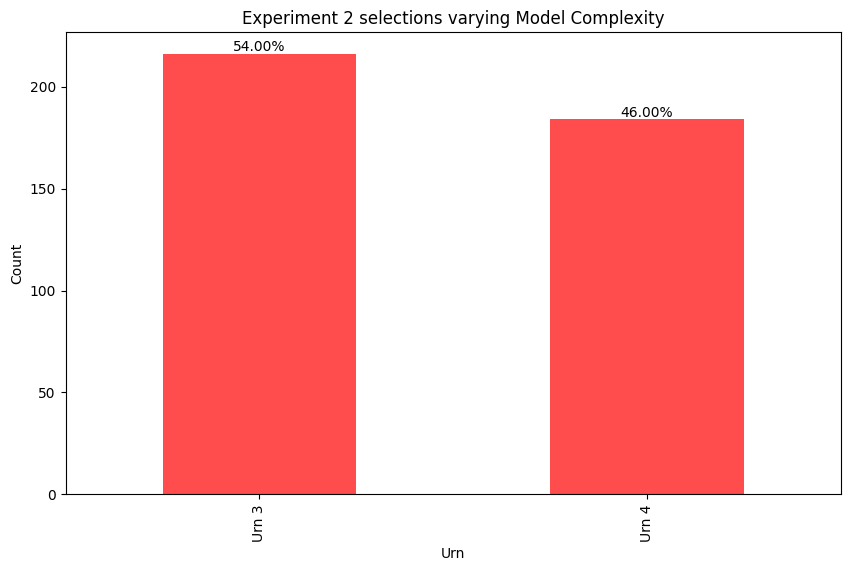

In [249]:
# File paths
files = {
    'tiny': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_tiny.csv',
    'small':f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_small.csv',
    'medium': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000.csv',
    'large': f'{output_path}results_n_1000_nn_100_epochs_100_batchsize_4000_large.csv',
}

plot_selection(CSV_FILES_PATHS=files,OUTPUT_PATH='/Users/carlota/Desktop/images/ellsberg/', TYPE=2, MODEL_TYPE='ellsberg')